# $2D\pm J$ Lattice SLRG Analysis Jupyter Notebook

In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *
# plt.style.use("notebooks/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


## Squared 2D Lattice

In [3]:
#
STEPS = 1500
SPIKE_THRESHOLD = 0.1
TAUSTOPEXT = 5
GEOMETRY = 'squared'
#
pow2_m, pow2_M, pow2_A = 10, 11, 16
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([1000 for i in range(len(ssize_range))])
#lsA = np.array([2**(pow2_A-i) for i in asize_range])

### Plot per system size $L$ and flip probability $p_{\rm flip}$

In [9]:
datpath = f"{datPath_l2d(GEOMETRY)}"
plotpath = f"{pltPath_l2d(GEOMETRY)}"
peakPosition = {iN: [] for iN in lsN}
tauDistribut = {iN: {} for iN in lsN}
#
fig_ext, ax_ext = plt.subplots(figsize=(16,10))
for iL, iN, iA in zip(lsL, lsN, lsA):
    #
    path = f"{datpath}N={iN}_navg={iA}/"
    lsp = lsp_read_values(path)
    lattice = Lattice2D(#
        side1 = iL,
        geometry = GEOMETRY,
        t2 = TAUSTOPEXT
    )
    fig_2, ax_2 = plt.subplots(figsize=(16,10))
    Cspe_plot_ax(ax_2)
    #
    taudist_mean = []
    for pflip in lsp:
        savename = lambda idstr : f"{path}p={pflip:{pflip_fmt}}_{idstr}{eBIN}"
        if not os.path.exists(savename('Sm1')):
            continue
        if not os.path.isdir((plpath := f"{pltPath_l2d(GEOMETRY)}N={iN}_navg={iA}/")):
            os.makedirs(plpath)
        #
        t = np.logspace(-2, TAUSTOPEXT, STEPS)
        Sm1FromFile = np.fromfile(savename('Sm1')).reshape(iA, STEPS)
        CspecFromFile = np.log(iN) * np.diff(Sm1FromFile, axis=1)/np.diff(np.log(t))
        CspecAvg = CspecFromFile.mean(axis=0)
        #
        fig, ax = plt.subplots(figsize=(16,10))
        #
        Cspe_plot_ax(ax)
        #
        ax.plot(t[:-1], CspecFromFile.T)
        ax.plot(t[:-1], CspecAvg, 'k--', lw=2)
        ccp = ax_2.plot(t[:-1], CspecAvg, c='k' if pflip < lattice.p_c else 'r')
        #
        full_arr_max = np.array([argrelextrema(i, np.greater)[0][0] 
                                 for i in CspecFromFile])
        # print(full_arr_max, full_arr_max.shape, CspecFromFile.shape)
        taudist = t[full_arr_max]
        taudist_mean.append(np.mean(taudist))
        # tauDistribut[iN][pflip] = taudist
        fig_3, ax_3 = plt.subplots(figsize=(16,10))
        #qui c'e da fare il lettore di tutti i picchi per ciascuna curva e poi
        # vederne la distribuzione!
        # Log binning parameters
        bin_centers, hist, bw = log_binning(taudist, 30)
        # Perform log binning
        ax_3.plot(bin_centers, hist, 'o-')
        # ax_3.hist(taudist, bins=20)
        ax_3.set_yscale('log')
        ax_3.set_xscale('log')
        fig_3.savefig(f"{plpath}p={pflip:{pflip_fmt}}_P(tau).pdf", bbox_inches='tight')
        fig_3.clear()
        plt.close(fig_3)
        arr_max = argrelextrema(CspecAvg, np.greater)[0]
        for idx in arr_max[CspecAvg[arr_max] > 0.2]:
            ax.axvline(t[idx], c='r', lw=1)
        ax_2.axvline(t[arr_max[0]], c=ccp[0].get_color(), lw=1)
        peakPosition[iN].append([pflip, t[np.min(arr_max)]])
        #
        fig.savefig(f"{plpath}p={pflip:{pflip_fmt}}_<C>.pdf", bbox_inches='tight')
        fig.clear()
        plt.close(fig)

    ax_ext.plot(lsp, taudist_mean, label=fr"$N = {iN}$")
    peakPosition[iN] = np.array(peakPosition[iN])
    fig_2.savefig(f"{plpath}<C>.pdf", bbox_inches='tight')
    fig_2.clear()
    plt.close(fig_2)
ax_ext.set_xscale('log')
fig_ext.savefig(f"{plotpath}fss_tau.pdf", bbox_inches='tight')
fig_ext.clear()
plt.close(fig_ext)
plt.close('all')

In [8]:
t[arr_max[CspecAvg[arr_max] > 0.2]]

array([  2.95334064, 331.3957221 ])

In [10]:
# n1, bins1= np.histogram(Pinf1,density=True,bins=np.logspace(-2,0,50))
# ns1 = gaussian_filter1d(n1, sigma=0.01)
ns21=-np.log(ns1)
plt.plot(bins1[:-1],ns21,lw=3,color=pal.pop(0),label='K=1',zorder=4)

NameError: name 'Pinf1' is not defined

In [18]:
log_binning(taudist, 20)

(array([ 11.37137493,  14.49025862,  18.4645741 ,  23.5289449 ,
         29.98234593,  38.20575343,  48.6846359 ,  62.03761371,
         79.05297933, 100.7352341 , 128.364389  , 163.57152996,
        208.435109  , 265.60364554, 338.45208162, 431.28102147,
        549.57061746, 700.30409071, 892.37998518]),
 array([ 0,  0,  0,  0,  0,  0,  6, 23, 34, 36, 17,  7,  4,  1,  0,  0,  0,
         0,  0]),
 array([  22.74274986,   28.98051725,   36.9291482 ,   47.0578898 ,
          59.96469185,   76.41150685,   97.3692718 ,  124.07522743,
         158.10595866,  201.47046821,  256.728778  ,  327.14305991,
         416.87021799,  531.20729107,  676.90416324,  862.56204293,
        1099.14123492, 1400.60818142, 1784.75997035]))

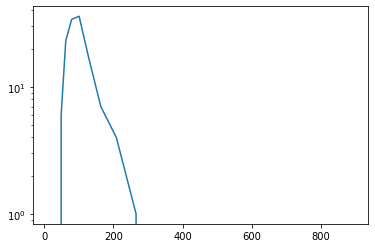

In [26]:
bin_centers, hist, width = log_binning(taudist, 20)
plt.plot(bin_centers, hist)
plt.yscale('log')

In [11]:
taudist_mean

[1.1637836725438908,
 1.1476874708954252,
 1.1210569894922016,
 1.078850163010645,
 1.0404033810986335,
 1.151934630672347,
 1.5970175533059296,
 1.691611218317159,
 1.7493720356706866,
 1.734677689941837,
 1.830887654585333,
 1.7629192805531793,
 1.7946921562553784,
 2.1133268875585847,
 2.2206570915140444,
 2.248403829464836,
 2.2637982156306466]

In [3]:
import numpy as np
np.mean([[1, 23, 4, 5], [1, 23, 4, 5]], axis=1)

array([8.25, 8.25])

____

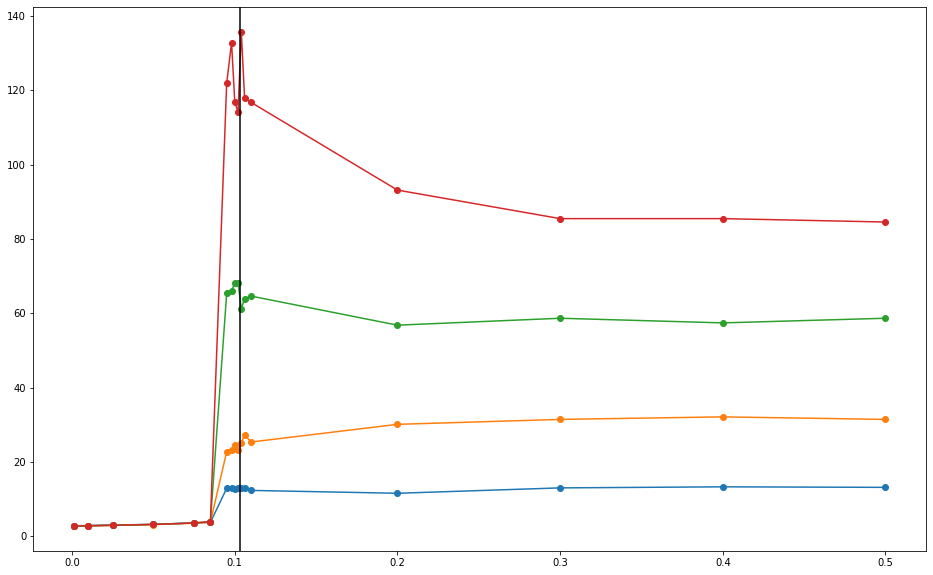

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
for key in peakPosition:
    plt.plot(peakPosition[key][:,0], peakPosition[key][:,1], 'o-')
ax.axvline(lattice.p_c, c='k')
# ax.set_yscale('log')

## Triangular 2D Lattice

In [10]:
#
STEPS = 1500
SPIKE_THRESHOLD = 0.1
TAUSTOPEXT = 4
GEOMETRY = 'triangular'
#
pow2_m, pow2_M, pow2_A = 6, 14, 16
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(pow2_A-i) for i in asize_range])
lsp = np.round([0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 0.098, 0.100, 
                0.102, 0.104, 0.106, 0.11, 0.2, 0.3, 0.4, 0.5], 3)

### Plot per system size $L$ and flip probability $p_{\rm flip}$

In [11]:
peakPosition = {iN: [] for iN in lsN}
for iL, iN, iA in zip(lsL, lsN, lsA):
    #
    path = f"{datPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
    lattice = Lattice2D(#
        side1 = iL,
        geometry = GEOMETRY
    )
    fig_2, ax_2 = plt.subplots(figsize=(16,10))
    Cspe_plot_ax(ax_2)
    #
    for pflip in lsp:
        savename = lambda idstr : f"{path}p={pflip:{pflip_fmt}}_{idstr}{eBIN}"
        if not os.path.exists(savename('Sm1')):
            continue
        plpath = f"{pltPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
        if not os.path.isdir(plpath):
            os.makedirs(plpath)
        #
        t = np.logspace(-2, TAUSTOPEXT, STEPS)
        Sm1FromFile = np.fromfile(savename('Sm1')).reshape(iA, STEPS)
        CspecFromFile = np.log(iN) * np.diff(Sm1FromFile, axis=1)/np.diff(np.log(t))
        CspecAvg = CspecFromFile.mean(axis=0)
        #
        fig, ax = plt.subplots(figsize=(16,10))
        Cspe_plot_ax(ax)
        #
        ax.plot(t[:-1], CspecFromFile.T)
        ax.plot(t[:-1], CspecAvg, 'k--', lw=2)
        ccp = ax_2.plot(t[:-1], CspecAvg, c='k' if pflip < lattice.p_c else 'r')
        #
        arr_max = argrelextrema(CspecAvg, np.greater)[0]
        for idx in arr_max[CspecAvg[arr_max] > 0.5]:
            ax.axvline(t[idx], c='r', lw=1)
            ax_2.axvline(t[idx], c='k' if pflip < lattice.p_c else 'r', lw=1)
        peakPosition[iN].append([pflip, t[np.min(arr_max)]])
        #
        fig.savefig(f"{plpath}p={pflip:{pflip_fmt}}_<C>.pdf", bbox_inches='tight')
        fig.clear()
        plt.close(fig)
    fig_2.savefig(f"{plpath}<C>.pdf", bbox_inches='tight')
    fig_2.clear()
    plt.close(fig_2)

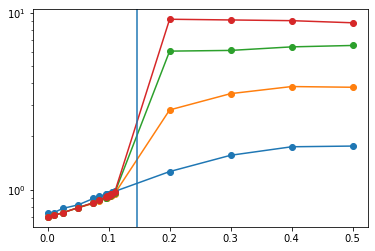

In [8]:
for key in peakPosition:
    peakPosition[key] = np.array(peakPosition[key])
for key in peakPosition:
    plt.plot(peakPosition[key][:,0], peakPosition[key][:,1], 'o-')
plt.axvline(0.146)
plt.yscale('log')

___

In [27]:
import os
import re
import numpy as np

folder_path = "/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/data/l2d_squared/N=4096_navg=128"

file_pattern = r"p=(\d+\.\d+)_Sm1.bin"
value_pattern = r"p=(\d+\.\d+)"

# Get all files in the folder
files = os.listdir(folder_path)

# Filter files based on the pattern
file_names = [file_name for file_name in files if re.match(file_pattern, file_name)]

# Extract values from file names
values = []
for file_name in file_names:
    match = re.search(value_pattern, file_name)
    if match:
        value = float(match.group(1))
        values.append(value)

# Sort the values if needed
values.sort()

# Load data from files using numpy's fromfile
data = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    arr = np.fromfile(file_path)
    data.append(arr)

# Access the extracted values and loaded data
for value, arr in zip(values, data):
    print("Value:", value)
    print("Data:")
    print(arr.reshape(128, 1500))
    print("---")


Value: 0.001
Data:
[[2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40431047e-05 2.44903660e-05 2.49459468e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
---
Value: 0.01
Data:
[[2.40424744e-05 2.44897120e-05 2.49452683e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40424920e-05 2.44897303e-05 2.49452872e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.40424767e-05 2.44897144e-05 2.49452708e-05 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [2.40424732e-05 2.44897108e-05 2.49452670e-05 ... 1.0000

In [25]:
128*1500*2

384000

In [26]:
np.fromfile("/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/data/l2d_squared/N=4096_navg=128/p=0.001_Sm1.bin").reshape(128, 1500)

array([[2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.40431047e-05, 2.44903660e-05, 2.49459468e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [9]:
bb = np.fromfile("data/l2d_sq/N=64_navg=1024/p=0.001_Sm1.bin").reshape(1024, 1500)
for i in bb:
    plt.plot(np.logspace(-2, 4, 1500),bb)
    plt.plot(np.logspace(-2, 4, 1499),np.log(64) * np.diff(i)/np.diff(np.log(np.logspace(-2, 4, 1500))))
plt.plot(np.logspace(-2, 4, 1500),np.mean(bb, axis=0), 'k', lw=2)
plt.xscale('log')

FileNotFoundError: [Errno 2] No such file or directory: 'data/l2d_sq/N=64_navg=1024/p=0.001_Sm1.bin'

In [ ]:
bb = np.fromfile("../data/l2d_squared/N=64_navg=1024/p=0.5_Sm1.bin").reshape(1024, 1500)
x = np.logspace(-2, 4, 1500)
x2 = np.logspace(-2, 4, 1500-1)
plt.plot(x2,(np.log(64) * np.diff(bb, axis=1)/np.diff(np.log(x))).T)
plt.xscale('log')

In [ ]:
L = 20
#
L2 = L * L
plen = 5
p_list = np.array([2 * L2 * p // (plen + 1) for p in range(1, plen + 1)])

In [ ]:
no_p = 10
no_rw = 5
pow2_m = 6
pow2_M = 14

lsN = np.array([2**i for i in range(pow2_m, pow2_M, 2)])
lsNavg = 2**np.array([(pow2_M-i+1) for i in range(pow2_m, pow2_M, 2)])

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [10, 20, 40, 80, 160, 240, 320]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=False)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()


In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [50, 100, 200, 400, 500, 600]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [512, 1024, 1200]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=100, width=4)

In [ ]:


plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.01 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
import numpy as np 
L = np.array([16, 32, 64])**2
L*0.103

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.1 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.2 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=10, width=5)

In [ ]:
G = nx.grid_2d_graph(L, L, periodic=True)
L2= L*L
p = int(0.2 * len(G.edges()))
ransample = random.sample(range(len(G.edges())), p)
for i,e in enumerate(G.edges()):
    G.add_edge(e[0], e[1], weight=1)
    if i in ransample:
        G[e[0]][e[1]]['weight'] = -1
lapl, w = get_graph_lspectrum_rw(G, is_signed=True)

In [ ]:
from scipy.sparse.linalg import eigs
L = 256
G = nx.grid_2d_graph(L, L, periodic=True)
lapl = nx.laplacian_matrix(G).asfptype()
a = eigs(lapl, k=1, which='SM', return_eigenvectors=False)